# K-Nearest Neighbors (KNN)

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [97]:
data=pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preprocessing

In [99]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [100]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [101]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [102]:
data.duplicated().sum()

0

In [103]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Correlation Analysis

<Axes: >

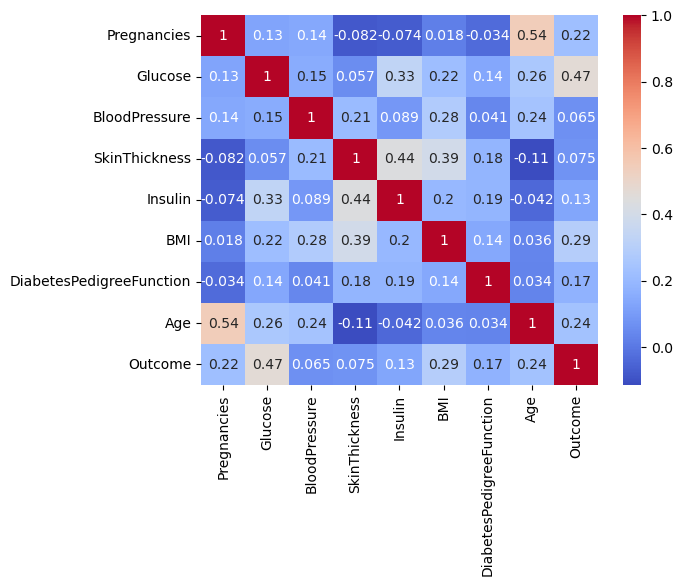

In [106]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

### Splitting Data into X and Y

In [108]:
X = data.drop(columns="Outcome")
y = data["Outcome"]

In [109]:
# Encoding (if necessary)

# from sklearn.preprocessing import LabelEncoder

# Not required here as data is already numerical

### Scaling

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data into training and testing

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2)

In [114]:
# Check data shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


In [125]:
from collections import Counter
print("Class distribution before balancing:", Counter(y_train))
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

print("Class distribution after oversampling:", Counter(y_train_oversampled))


Class distribution before balancing: Counter({0: 345, 1: 192})
Class distribution after oversampling: Counter({0: 345, 1: 345})


### KNN Modeling

In [127]:
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'SVM-SVC': SVC(kernel='linear', C=1),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy')
}
for name, model in algorithms.items():
    model.fit(X_train_oversampled,y_train_oversampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy * 100}%")
    
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # print("\nConfusion Matrix:\n", conf_matrix)
    
    # report = classification_report(y_test, y_pred)
    # print("\nClassification Report:\n", report)

Accuracy of Logistic Regression: 76.19047619047619%
Accuracy of KNN: 73.16017316017316%
Accuracy of Naive Bayes: 76.62337662337663%
Accuracy of SVM-SVC: 75.32467532467533%
Accuracy of Decision Tree: 74.45887445887446%


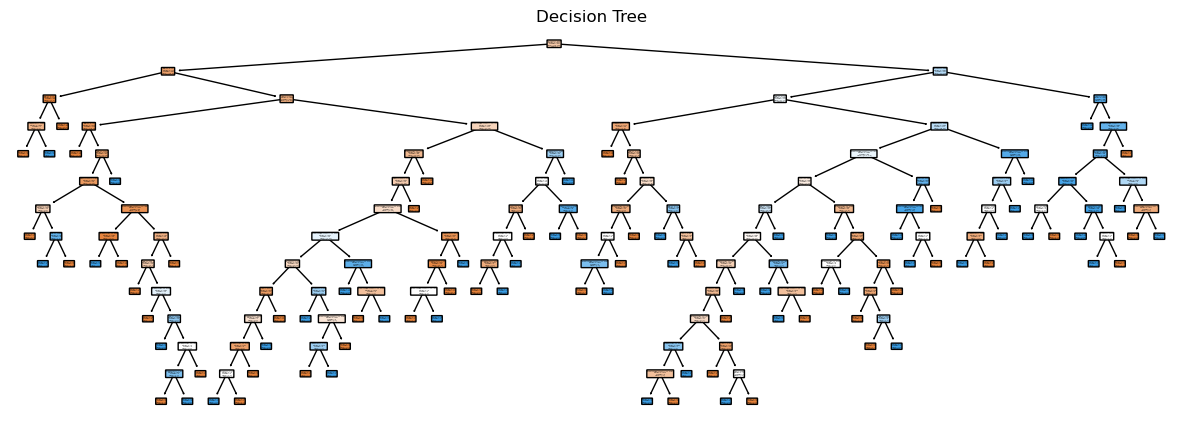

In [129]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(clf, 
          feature_names=X.columns,  
          class_names=[str(i) for i in y.unique()],
          filled=True, 
          rounded=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
#END